# The Perceptron

The *Perceptron* is on of the simplest Artificial neural network architectures, proposed in 1957 by Frank Rosenblatt. It is based on a *threshold logic unit (TLU)* and it computes a weighted sum of its inputs

$$ z = w_1x_1 + \cdots + w_nx_n = \textbf{x}^{\intercal}\textbf{w} $$

then applies a step function to that sum and outputs the result: $h_w(\textbf{x})=\text{step}(\textbf{x})$. One of the most common step function used is the *Heaviside step function*

$$ \text{heaviside}(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z\gt0 \end{cases}$$

A single TLU can be used for binary classification; it computes a linear combination of its inputs and if the output reaches a threshold, it outputs a positive class, otherwise outputs the negative class.

A perceptron is composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer the layer is called a *fully connected* or *dense* layer. *Input Neurons* are simple inputs that output whatever they are fed and all input neurons form the *input layer*. A bias neuron is generally added, tipycally represented by a *bias neuron*, which outputs 1 all the time. (e.g. architecture pg 286 fig 10-5)

We can then write the outputs of a fully connected layer as 
$$ h_{\textbf{W, b}}(\textbf{X}) = \phi(\textbf{XW + b})$$
Where
- $\textbf{X}$ is the matrix of input features (one row per instance, one col per feature)
- $\textbf{W}$ contains the connection weights, except the ones from the bias neuron (one row per input neuron, one column per artificial neuron in the layer)
- $\phi$ is called the *activation function* (when the neurons are TLU, this is a step function)

The perceptron learning rule reinforces connections between neurons tha help reduce the error: the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong predictions, it reinforces the connection weights from the inputs that would have contributed to the correct prediction

$$ w_{i,j}^{\text{next step}} = w_{i,j} +\eta(y_j - \hat{y_j})x_i$$

where 
- $w_{i,j}$ is the weight between ith input neuron and jth output neuron
- $x_i$ is the ith input value of the current training instance
- $\hat{y_j}$ is the output of the jth output neuron 
- $y_j$ is the target output of the jth ouptut neuron
- $\eta$ is the learning rate

# The multilayer perceptron and backpropagation

An MLP consistis of one input layer, one or more layers of TLUs (called *hidden layers*) and one final layer of TLUs called the *output layer*. Every except the output layer includes a bias neuron and is fully connected to the next layer.

To train an MLP, we use [backpropagation](https://homl.info/44). In short, it is Gradient Descent and it is able to compute the gradient of the network's error with regard to every single model parameter, thus it is able to find out how much it should tweak each connection weight and bias in order to reduce the error. This process is called *autodiff*, appendix D has more info on it.

Here's how it works
- It handles one mini-batch at a time (e.g. 32 instances) and goes through the training set multiple times, each pass is called an *epoch*
- Each mini-batch is passed is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the outputs of this layer and passes it to the next layer, and so on, until we get the output of the output layer. This is called a *forward pass* and the intermediate results are saved
- Next we calculate the network's output error (using some loss function)
- Then it computs how much each output connection contributed to the error (done using chain rule)
- The algorithm then measures how much of these error contributions came from each connection in the layer below until it reaches the input layer
- Finally, it performs a gradient descent step to tweak all the connection weights in the network

One change that had to be made to the original MLP architecture was replacing the step function with the logistic function $\sigma(z) = 1 / (1 +\exp(-z))$, this allows for gradients to be computed as it is a smooth function.

Some other choices of function are:
- Hyperbolic tan $\tanh(z) = 2\sigma(2z) - 1$

Another S-shaped function, continues and differentiable. Its outputs are in the range -1 to 1, making each layer's output more or less centered around 0 at the beginning of training, which helps speed up convergence.

- Rectified Linear unit $ReLU(z) = \max(0,z)$

Continuous but not differentiable at $z=0$, however it works very well and has become the default.

Activation functions are useful because they can add non-linearity to each layer. Recall that a linear transformation of linear transformations is also linear. Using a non-linear function allows for an MLP to learn more complex patterns.

## Regression MLPs

To use MLP for regression we use an output neuron for each value we want to predict. In the univariate case (e.g. predicting house price) only a single output neuron is needed. 

For multivariate problems, you need one output neuron per output dimension. For example to locate the center of an object in an image, you need to predict 2D coordinates, thus 2 output neurons. If you also want to place a bounding box around the object, you need two more numbers, the width and height of the object. In total, 4 output neurons.

In general we do not want to use any activation function for output neurons so they are free to output any range of values. To guarantee the range of values is always positive, use ReLU or *softplus*, which is a smooth variant of ReLU: $\text{softplus}(z) = \log(1 + \exp(z))$. 
Finally if we want to guarantee the predictions will fall between a range of values we can use the logistic or hyperbolic tangent function, scaling the labels to the appropriate values.

The typical loss function used is MSE, however if you have a lot of outliers in your training set you may want to use the mean absolute error instead. Alternatively use [Huber loss](https://en.wikipedia.org/wiki/Huber_loss), which is a combination of both.


Typical regression MLP architecture

| Hyperparameter | Typical value |
|     ---        |      ---      |
|# input neurons | One per input feature (e.g. 28x28=784 for MNIST) | 
|# hidden layers | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) |
|# output layer | 1 per prediction dimension |
|Activation function | $\begin{cases} 
                        \text{None} & \text{ for any range of values } \\ 
                        ReLU/\text{softplus} & \text{ positive outputs }\\
                        \text{logistic/tanh} & \text{ bounded outputs}
                        \end{cases}$ |
|Loss Function | MSE or MAE/Huber (if outliers)|

## Classification MLPs

For binary classification, we just need a single output neuron using the logistic activation function. The output will be in the range 0 - 1 and we can interpret it as an estimated class probability of the positive class. The estimated probability for the negative class is one minus that number.

MLPs can also be used for multilabel binary classification. For example, in an e-mail classification system that tags messages as spam/ham and urgent/non-urgent we would use two output neurons with the logistic function. The first outputs the probability that the e-mail is spam and the second the probability the e-mail is urgent. 
More generally, we use one output neuron for each positive class.

For multiclass calssification (e.g. identifying digit classes 0 through 9), then we need one output neuron per class and should use the softmax activation to ensure estimated probabilities are between 0-1 and they add up to 1.

For the loss function, since we're preducting probability distributions, the cross-entropy loss is generally a good choice

Typical classification MLP architecture

| Hyperparameter | Binary Classification | Multilabel Binary Classification | Multiclass Classification | 
| --- | --- | --- | --- |
|# input neurons | One per input feature | One per input feature | One per input feature |
|# hidden layers | Variable (typically 1 to 5) | Variable (typically 1 to 5) | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) | Variable (typically 10 to 100)| Variable (typically 10 to 100)|
|# output neurons | 1 | 1 per label | 1 per class |
|Activation Function| Logistic | Logistic | Softmax |
|Loss Function | Cross Entropy | Cross Entropy | Cross Entropy |

# Exercise 1
Play around in the [Tensorflow Playground](https://playground.tensorflow.org) to get a better feeling for ANNs and explore the following:

# Implementing MLPs with Keras

## Building an Image Classifier using the Sequential API

In this chapter, we will tackle Fashion MNIST, which is a drop-in replacement of MNIST. The images represent fashion items instead of digits, so each class is more diverse.

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

Data is loaded as ints in the range from 0 to 255. Let's create a validation set and scale the features

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

We need to map the target values to their actual class as well

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Creating the model using the Sequential API
We'll start by creating a classification MLP with two hidden layers

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28,28])) # Converts inputs to 1D array
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


The Sequential API is the simplest kind of model for NNs that are just composed of a single stack of layers connected sequentially. Another way to write the same model could be as follows

In [8]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

We can vew a definition of the model by using summary()

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Since the model has a lot of parameters, it has a lot of flexibility to train the data. However this also means that it runs the risk of overfitting, especially when we don't have much training data.

We can view a model's Layers

In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

As well as it's weights and biases

In [12]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01190935, -0.02662365,  0.05324669, ...,  0.0494841 ,
        -0.06483872,  0.07305315],
       [-0.00893984, -0.06924371, -0.07077597, ..., -0.04943123,
         0.03560346,  0.05264443],
       [ 0.03196555,  0.02825633, -0.04930341, ..., -0.00858872,
         0.01880597,  0.01205157],
       ...,
       [-0.04694034,  0.06772318,  0.0301396 , ...,  0.06040362,
        -0.05731079,  0.05229205],
       [-0.05691219, -0.05847605,  0.00148755, ..., -0.07146315,
        -0.02082144,  0.01556862],
       [-0.03562712, -0.01602892, -0.03188283, ..., -0.01397945,
        -0.06196937, -0.03350033]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Note the weights are initialized randomly (to break simmetry) and the biases set to zero. To use other initialization methods we can set the ```kernel_initializer``` or ```bias_initializer``` when creating the layer.

Next we compile the model

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

We use ```sparse_categorical_crossentropy``` because we have sparse labels (i.e. for each instance there is only a single target class) and the classes are exclusive. If instead we had one target probability per class for each instance  (such as one-hot vectors for a single class) we'd use ```categorical_crossentropy``` instead. 

The optimizer set to ```sgd``` means we'll train the model using simple stochastic gradient descent. 

Finally, we can fit the model

In [62]:
RELOAD = True
CHAPTER_DIR = 'saved_models/10_intro_to_anns/'

In [19]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1.h5')
    history = model.history
else:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 93us/step - loss: 0.7088 - accuracy: 0.7669 - val_loss: 0.5175 - val_accuracy: 0.8220
Epoch 2/30
55000/55000 [==============================] - 5s 88us/step - loss: 0.4851 - accuracy: 0.8312 - val_loss: 0.4464 - val_accuracy: 0.8480
Epoch 3/30
55000/55000 [==============================] - 5s 88us/step - loss: 0.4431 - accuracy: 0.8444 - val_loss: 0.4512 - val_accuracy: 0.8406
Epoch 4/30
55000/55000 [==============================] - 5s 87us/step - loss: 0.4159 - accuracy: 0.8541 - val_loss: 0.4172 - val_accuracy: 0.8556
Epoch 5/30
55000/55000 [==============================] - 5s 95us/step - loss: 0.3968 - accuracy: 0.8618 - val_loss: 0.3883 - val_accuracy: 0.8690
Epoch 6/30
55000/55000 [==============================] - 5s 92us/step - loss: 0.3801 - accuracy: 0.8651 - val_loss: 0.3769 - val_accuracy: 0.8692
Epoch 7/30
55000/55000 [==============================] - 5s 95us/ste

Note: instead of passing a validation set, you can also set the ```validation_split``` argument of the ```fit``` method to the ratio of the training set you want Keras to use for validation. 

If the training set is very skewed, with some classes being underrepresented, it can be useful to set the ```class_weight``` parameter, this would give larger weight to underrepresented classes and a lower weight to overrepresented classes.

If you need per instance weights, the ```sample_weight``` can be used. Per-instance weights can be useful if some instances are labelled by experts while others were labeled using a crowdsourcing platform: we might want to give more weights to the former.

We can access the ```history.history``` to access the loss and accuracy of the model

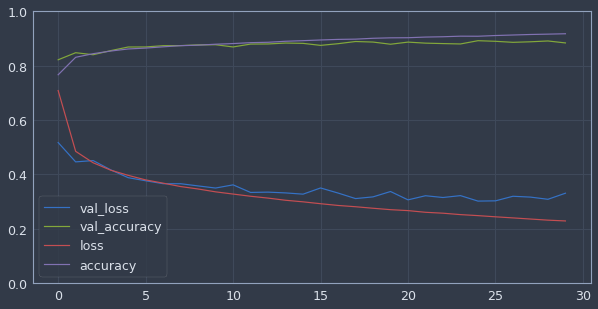

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

It looks like the model performed better on the validation set than on the training set at the beginning, but this is not true.

The validation error is computed at the *end* of each epoch while the training error is computed using a running mean *during* each epoch. So the training curve should actually be shifted half an epoch to the left. 

We can also tell that the model has not quite converged yet as the validation is still going down. We can continue training from where we left off by calling the fit method again.

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 78us/step - loss: 0.2244 - accuracy: 0.9194 - val_loss: 0.3026 - val_accuracy: 0.8912
Epoch 2/20
55000/55000 [==============================] - 4s 80us/step - loss: 0.2214 - accuracy: 0.9203 - val_loss: 0.2965 - val_accuracy: 0.8966
Epoch 3/20
55000/55000 [==============================] - 4s 80us/step - loss: 0.2179 - accuracy: 0.9216 - val_loss: 0.2981 - val_accuracy: 0.8938
Epoch 4/20
55000/55000 [==============================] - 5s 83us/step - loss: 0.2142 - accuracy: 0.9229 - val_loss: 0.3025 - val_accuracy: 0.8952
Epoch 5/20
55000/55000 [==============================] - 4s 76us/step - loss: 0.2112 - accuracy: 0.9236 - val_loss: 0.3011 - val_accuracy: 0.8954
Epoch 6/20
55000/55000 [==============================] - 4s 81us/step - loss: 0.2084 - accuracy: 0.9249 - val_loss: 0.2922 - val_accuracy: 0.8948
Epoch 7/20
55000/55000 [==============================] - 4s 81us/ste

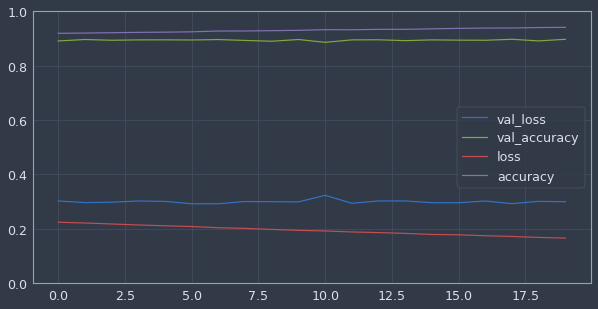

In [23]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1_hist2.h5')
    history2 = model.history
else:
    history2 = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1_hist2.h5')

pd.DataFrame(history2.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

To improve the model's performance, we perform our usual task: tuning hyperparameters.

The first one to check is the learning rate. If that doesn't help we should check the optimizer (always re-tuning the learning rate after changing any other hyperparameter). If performance is still not great, we can tune the architecture, by changing the number of layers, neurons in each hidden layer and the activation function in the hidden layers.

To estimate the generalisation error, we use the ```evaluation()``` method

In [24]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/step


[72.8416064743042, 0.8514999747276306]

### Making Predictions

Let's use this model to make predictions on the first 3 instances of the test set

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the model estimated the probability per class, from class 0 to class 9. If we don't care about probabilities and only want the class that has the highest probability we can use ```predict_classes()``` instead.

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [27]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

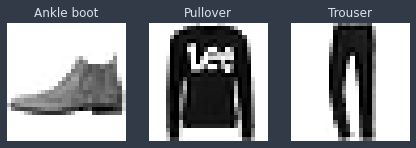

In [28]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Building a regression MLP using the Sequential API

We'll use scikit-learn to import a simplified version of the California housing dataset (only numerical features and no missing values). 

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Building the model is pretty similar to the steps taken for the example above. Since we're predicting house prices we only need 1 output and the output layer won't use an activation function and, we'll also use mean squared error as the error function. 

Since the dataset is noisy, we'll use a single layer with a few neurons to avoid overfitting.

In [37]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model2.h5')
else:
    model = Sequential([
        Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='sgd')
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model2.h5')

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 33us/step - loss: 1.3492 - val_loss: 10.4417
Epoch 2/20
11610/11610 [==============================] - 0s 27us/step - loss: 25.6096 - val_loss: 0.6001
Epoch 3/20
11610/11610 [==============================] - 0s 28us/step - loss: 0.4792 - val_loss: 0.4679
Epoch 4/20
11610/11610 [==============================] - 0s 31us/step - loss: 0.4213 - val_loss: 0.4998
Epoch 5/20
11610/11610 [==============================] - 0s 29us/step - loss: 0.4235 - val_loss: 0.4189
Epoch 6/20
11610/11610 [==============================] - 0s 29us/step - loss: 0.3933 - val_loss: 0.4144
Epoch 7/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.3837 - val_loss: 0.4018
Epoch 8/20
11610/11610 [==============================] - 0s 31us/step - loss: 0.3775 - val_loss: 0.4015
Epoch 9/20
11610/11610 [==============================] - 0s 31us/step - loss: 0.3718 - val_loss: 0.3950
Epoc

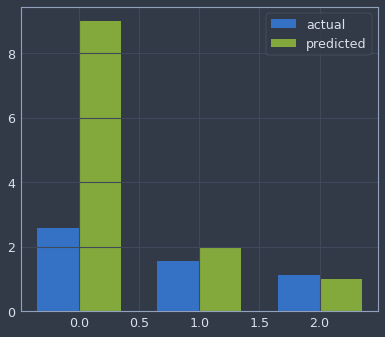

In [31]:
fig, ax = plt.subplots()

width = 0.35
actual = y_test[:X_new.shape[0]]
preds = y_pred.reshape(1,-1)[0]
x_pos = np.arange(X_new.shape[0])

ax.bar(x= x_pos-width/2.0, height=actual, width=width, label='actual')
ax.bar(x= x_pos+width/2.0, height=preds, width=width, label='predicted')
ax.legend()
fig.show()

The sequential API is quite easy to use, however for more complex models Keras offers the Functional API.

## Building complex models with the Functional API

One example of a non-sequential networs is a *Wide and Deep* NN, which was first introduced in a [2016 paper](https://homl.info/widedeep). This architecture allows for the Neural Net to learn both deep pattens (using the deep path) and simple rules (through the short path) (example image on page 309).

In contrast, a regular MLP forces the data to go through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

One example network for the California housing dataset:

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
from keras.layers import Input

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Here's a breakdown of what's happening in the code above:
- We create an Input object, containint a specification of what type of input the model will get (a model may have multiple inputs)
- Next create a Dense layer, with 30 neurons using ReLU. We call it like a function passing it the inputs (hence functional api)
- Create a second hidden layer as above and use it as a function. We pass it the outputs of the first hidden layer
- Next we use the ```concatenate``` function, which creates a Concatenate layer and pass calls it with the given inputs
- Create output layer with single neuron, passing it the result of concatenation
- Finally create the model, specifying the inputs and outputs

Now that's done we do exactly as above, comple, train, evaluate the model and use it to make predictions

What if we wanted to send some features through the wide path and a different subset (possibly overlapping) through the deep path (see fig on pg 310)? One solution is to use multiple inputs. For example we could send 5 features through the wide path (feats 0 to 4) and six through the deep path (feats 2 to 7)

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

A good tip is to name the most important layers, especially as the model gets more complex. Also note that we specified ```inputs=[input_A, input_B]``` so when we're calling the fit method we need to pass a pair of matrices (X_train_A, X_train_B).

In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model3.h5')
else:    
    history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                         validation_data=((X_valid_A, X_valid_B), y_valid))
    model.save(CHAPTER_DIR + 'model3.h5')
    
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1468 - val_loss: 0.8962
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8029 - val_loss: 0.6787
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6703 - val_loss: 0.6205
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6175 - val_loss: 0.5889
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5835 - val_loss: 0.5646
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 0.5448
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5373 - val_loss: 0.5306
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.5163
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5055 - val_loss: 0.5043
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4937 - val_loss: 0.4960

There are also cases where you may want to have multiple outputs:
- The task may demand it; e.g. locate and classify the object in a picture. This is both regression task (finding the coordinates of the object center) and classification task
- There may be multiple independent tasks based on the same data. For example you could perform *multitask classification* on pictures of faces to classify the person's facial expression and another to identify whether they're wearing sunglasses or not
- Another use case is as a regularization technique. For example you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network (see fig 10-16 pg 312)

To add extra outputs, simply connect them to the appropriate layers and add them to the model's list of outputs

In [40]:
# Continuing from the architecture above
# ...
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function, when compiling the model we need to passa list of losses (or a single loss, Keras will assume that the same loss must be used for all). By default, Keras will compute all these losses and simply add them to arrive at a final loss for training. If we care more about the main output's loss, we can specify loss weights when compiling

In [41]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when training the model we also need to pass the labels to the auxiliary output. In this case they're trying to predict the same output so we just pass y_train again

In [42]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model4.h5')
else:
    history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
    model.save(CHAPTER_DIR + 'model4.h5')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8676 - main_output_loss: 0.7595 - aux_output_loss: 1.8407 - val_loss: 1.5737 - val_main_output_loss: 1.6217 - val_aux_output_loss: 1.1420
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5154 - main_output_loss: 0.4582 - aux_output_loss: 1.0293 - val_loss: 1.0300 - val_main_output_loss: 1.0367 - val_aux_output_loss: 0.9694
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5154 - main_output_loss: 0.4728 - aux_output_loss: 0.8989 - val_loss: 0.6058 - val_main_output_loss: 0.5834 - val_aux_output_loss: 0.8075
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4747 - main_output_loss: 0.4376 - aux_output_loss: 0.8085 - val_loss: 0.4632 - val_main_output_loss: 0.4328 - val_aux_output_loss: 0.7375
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4390 - main_output_loss: 0.4065 - aux_output_loss: 0.7308 - val_loss

When we evalute the model, keras returns the total loss as well as the individual losses.

In [43]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 856us/step - loss: 0.3638 - main_output_loss: 0.3525 - aux_output_loss: 0.4661


Similarly for the ```predict()``` method

In [44]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Subclassing to build Dynamic Models

The sequential and functional API are delcarative; you specify which layers you want to use and how are they connected. This means they're easily saved, used, cloned and shared among other advantages. The flip side is that they're static.

Some models may have loops, branches, varying shapes and other dynamic behaviors. For these, you can use the subclassing API.

Simply sublclass the Model class and create the layers you want in the ```call()``` method. The example below builds a class for the ```WideAndDeepModel``` discussed above.

In [55]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

Usage is similar to the functional API, except we do not need to create the inputs. We just use the input argument to the ```call()``` method and separaate the creation of layers in the constructor from their usage in the ```call()``` method. This enables you to use loops, if statements, low-level tensorflow operations, etc...

The cost is that the model architecture is hidden behind the call method. Keras cannot check types, and shapes ahead of time and it is easier to make mistakes. 

**Note:** Keras models can be used like regular layers so you can easily combine them to build complex architectures.

## Saving and restoring a model

Keras uses HDF5 to save the model's architecture and the values of the model parameters for every layer (weights and biases). It also saves the optimizer. You would have seen the save function scattered through this notebook and the load function as well to re-store the models


Note that this works when using the Sequential or Functionla APIs but not when using model subclassing. You can use ```save_weights()``` and ```load_weights()``` to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

## Using Callbacks

What if training lasts several hours? Which is quite common, especially on large datasets. In this case we should not only save the final model but save at regular checkpoints during training to avoid losing everything due to a crash. 

The ```fit()``` method accepts a ```callbacks``` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

The ```ModelCheckpoint``` callback saves checkpoints at regular intervals during training, at the end of each epoch. Moreover, if we use a validation set while training, you can set ```save_best_only=True``` when creating the model checkpoint. Then it only saves the model when its performance on the validation set is the best so far. This way we don't need to save the train the model for too long and overfitting the training set: simply restore the last model saved after training and this will be the best model on the validation set. 
The following is a simple way of implementing early stopping.

In [59]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(CHAPTER_DIR + "my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model(CHAPTER_DIR + "my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.2844 - val_loss: 0.9851
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7927 - val_loss: 0.6585
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6355 - val_loss: 0.6066
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5908 - val_loss: 0.5773
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5598 - val_loss: 0.5530
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5331 - val_loss: 0.5317
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5116 - val_loss: 0.5163
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4925 - val_loss: 0.4974
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4774 - val_loss: 0.4845
Epoch 10/10
162/162 [==============================] - 0s 754us/step - loss: 0.4639


Another way of implementing early stopping is to simply use the ```EarlyStopping``` callback. It interrupts training when it measures no progress on the validation set for a number of epochs (defined by the ```patience``` arg). You can combine both callbacks to save checkpoints of your model and interrupt training early when there is no more progress.

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4505 - val_loss: 0.4663
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4395 - val_loss: 0.4586
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4331 - val_loss: 0.4521
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.4469
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4199 - val_loss: 0.4429
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4142 - val_loss: 0.4419
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.4410
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_loss: 0.4341
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4026 - val_loss: 0.4314
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3983 - val_lo

This way we can also set the number of epochs to a large value since training will stop when there's no more progress.

You can also write your own custom callbacks. Below is an example of a callback that displays the ratio between validation loss and the training loss during training (e.g. to detect overfitting).

In [61]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

345/363 [===========================>..] - ETA: 0s - loss: 0.3268
val/train: 1.11
363/363 [==============================] - 0s 1ms/step - loss: 0.3274 - val_loss: 0.3635


We can also implement ```on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()```. They can also be used during evaluation and predictions (e.g. for debugging), see notes on pg 316 for more on that.